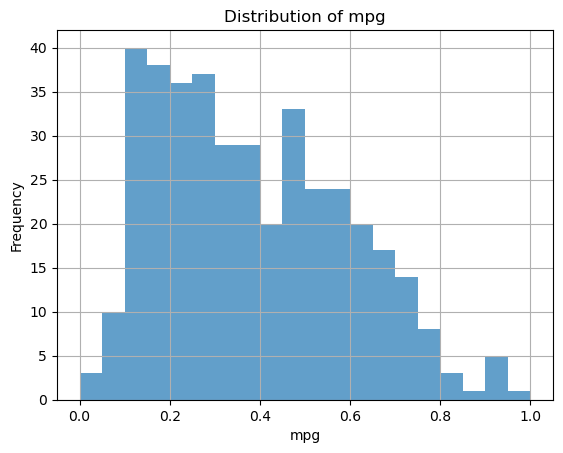

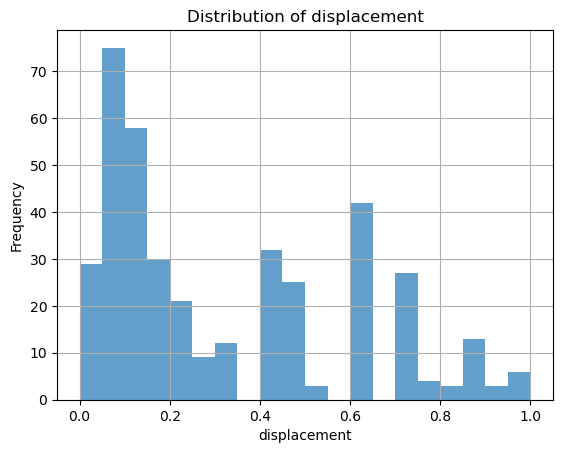

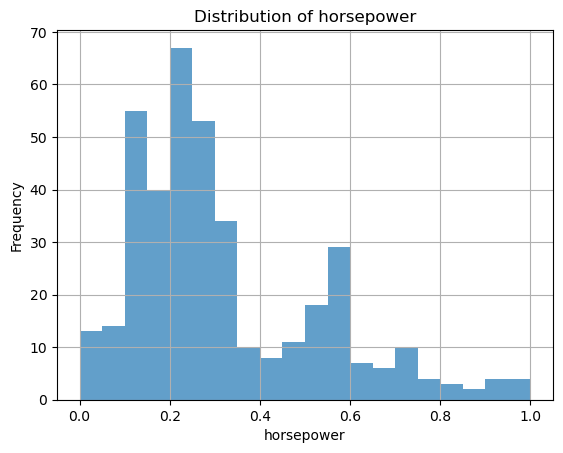

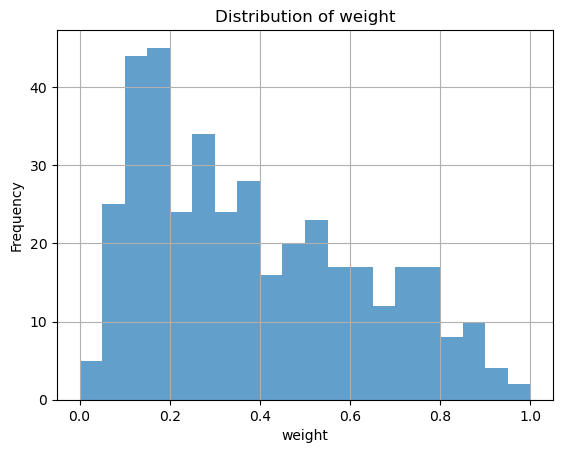

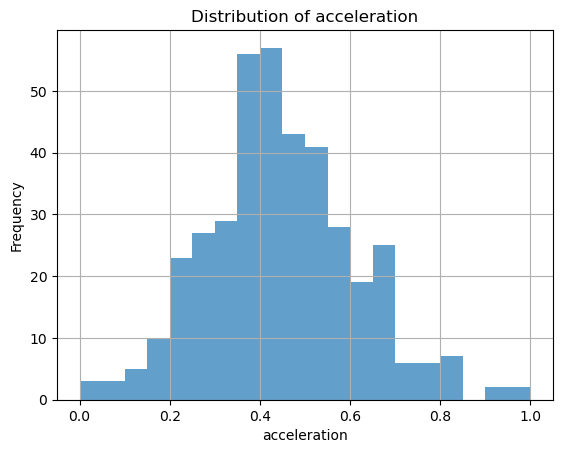

In [ ]:
# Exercise 1

import pandas as pd
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt

data = pd.read_csv('auto-mpg.csv')

# Apply one-hot encoding
encoded_data = pd.get_dummies(data, columns=['origin'], prefix='origin')

# Normalize each field of the input data using the min-max normalization technique
scaler = MinMaxScaler()
numerical_columns = ['mpg', 'displacement', 'horsepower', 'weight', 'acceleration']
encoded_data[numerical_columns] = scaler.fit_transform(encoded_data[numerical_columns])

# Plot the data
for column in numerical_columns:
    encoded_data[column].hist(bins=20, alpha=0.7)
    plt.title(f'Distribution of {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')
    plt.show()

# Data Analyzation
# - mpg: skewed to right
# - displacement: skewed to right
# - horsepower: skewed to right
# - weight: skewed to right
# - acceleration: symmetric



              precision    recall  f1-score   support

       Japan       0.76      0.94      0.84        17
         USA       0.98      0.90      0.93        48

    accuracy                           0.91        65
   macro avg       0.87      0.92      0.89        65
weighted avg       0.92      0.91      0.91        65



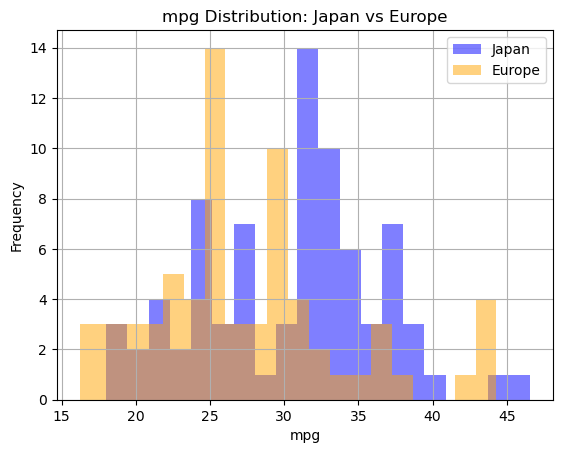

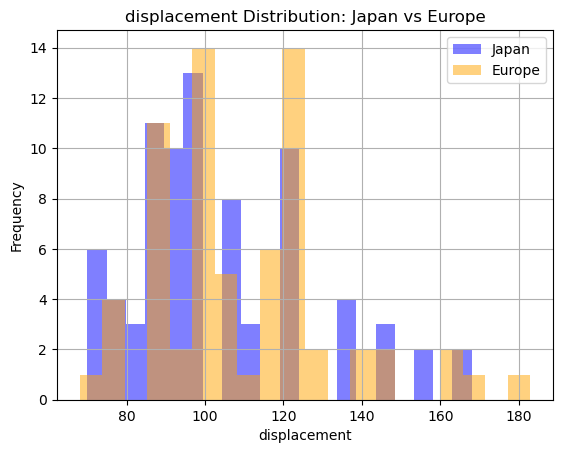

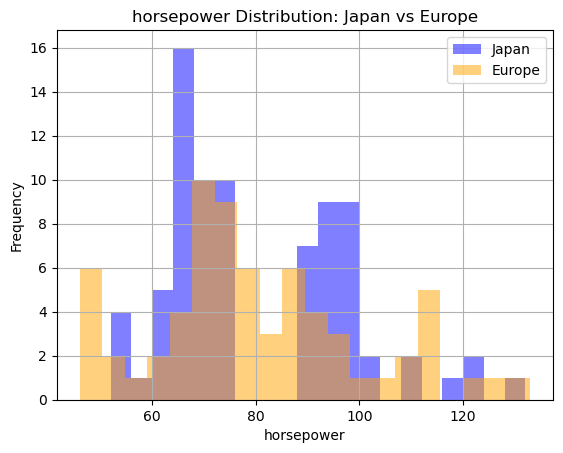

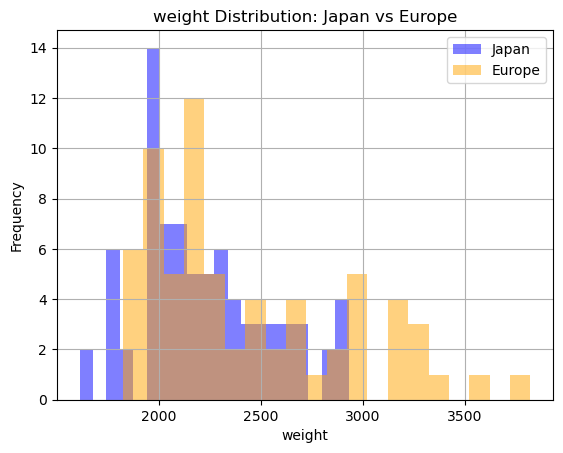

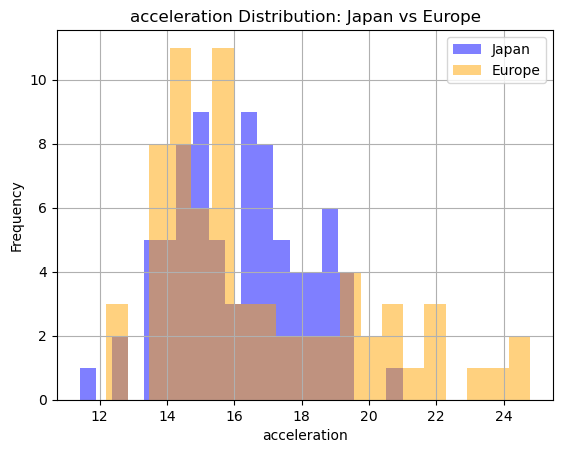

In [20]:
# Exercise 2
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

data = pd.read_csv('auto-mpg.csv')

# Remove "Europe"
filtered_data = data[data['origin'].isin(['USA', 'Japan'])]

# Apply one-hot encoding
filtered_data = pd.get_dummies(filtered_data, columns=['origin'], prefix='origin')

# Define features and targets
numerical_columns = ['mpg', 'displacement', 'horsepower', 'weight', 'acceleration']
X = filtered_data[numerical_columns]
y = filtered_data['origin_USA']

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Build a Logistic Regression model
model = LogisticRegression()
model.fit(X_train, y_train)

# Prediction
y_pred = model.predict(X_test)

# Report the precision and recall
report = classification_report(y_test, y_pred, target_names=['Japan', 'USA'])
print(report)

japan_europe_data = data[data['origin'].isin(['Japan', 'Europe'])]
japan_europe_data = pd.get_dummies(japan_europe_data, columns=['origin'], prefix='origin')

for column in numerical_columns:
    japan_europe_data[japan_europe_data['origin_Japan'] == 1][column].hist(bins=20, alpha=0.5, label='Japan', color='blue')
    japan_europe_data[japan_europe_data['origin_Japan'] == 0][column].hist(bins=20, alpha=0.5, label='Europe', color='orange')
    plt.title(f'{column} Distribution: Japan vs Europe')
    plt.xlabel(column)
    plt.ylabel('Frequency')
    plt.legend()
    plt.show()
    
# From the histograms, the horsepower, mpg, and acceleration have clearly different distributions,  which is highly predictive of the accuracy of a model using them.
# On the other hand, the other features have a lot of overlap in their distributions, which could potentially have negative effect on model performance.